Plot the science SolO/STIX data

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido
from stixpy.product import Product
from datetime import datetime, timedelta
from sunpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from matplotlib.collections import QuadMesh
import matplotlib.dates as mdates
# from matplotlib import dates
import astropy.units as u
import numpy as np
import pandas as pd
# from astropy.io import fits
from astropy.time import Time

In [2]:
start_time = '2025-03-25T12:21:00'
end_time   = '2025-03-25T13:12:00'

sci_query = Fido.search(a.Time(start_time, end_time),
                        a.Instrument.stix, a.stix.DataType.sci)
display(sci_query)

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str13,str3,int64
2025-03-25 12:05:35.000,2025-03-25 14:20:55.000,STIX,L1,SCI,sci-xray-cpd,V02,2503251375
2025-03-25 12:07:13.000,2025-03-25 12:26:12.000,STIX,L1,SCI,sci-xray-cpd,V02,2503256348
2025-03-25 12:09:33.000,2025-03-25 12:27:50.000,STIX,L1,SCI,sci-xray-cpd,V02,2503259961
2025-03-25 12:23:52.000,2025-03-25 13:31:48.000,STIX,L1,SCI,sci-xray-cpd,V02,2503259592
2025-03-25 08:54:58.000,2025-03-25 15:00:15.000,STIX,L1,SCI,sci-xray-spec,V02,2503256095


In [21]:
sci_files = Fido.fetch(sci_query)
print(*sci_files, sep='\n')

Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]

/home/mnedal/sunpy/data/solo_L1_stix-sci-xray-cpd_20250325T120535-20250325T142055_V02_2503251375-49571.fits
/home/mnedal/sunpy/data/solo_L1_stix-sci-xray-cpd_20250325T120713-20250325T122612_V02_2503256348-50166.fits
/home/mnedal/sunpy/data/solo_L1_stix-sci-xray-cpd_20250325T120933-20250325T122750_V02_2503259961-50040.fits
/home/mnedal/sunpy/data/solo_L1_stix-sci-xray-cpd_20250325T122352-20250325T133148_V02_2503259592-50053.fits
/home/mnedal/sunpy/data/solo_L1_stix-sci-xray-spec_20250325T085458-20250325T150015_V02_2503256095-49356.fits


In [22]:
dyspec = Product(sci_files)

In [23]:
dyspec

[CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x72e798c86520>
     Start: 2025-03-25 12:05:35
     End:   2025-03-25 14:20:55
     Center:2025-03-25 13:13:15
     Duration:0.0939861111111111 days or
            2.2556666666666665 hours or
            135.33999999999997 minutes or
            8120.4 seconds
     DetectorMasks
     [0...128]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
 
     PixelMasks
     [0...128]: [['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0']]
 
     EnergyMasks
     [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,_,_,_,_,_,_,_,_,_,_,_,_,_,_],
 CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x72e798c86ca0>
     Start: 2025-03-25 12:07:13
     End:   2025-03-25 12:26:12
     Center:2025-03-25 12:16:42
     Duration:0.01317708333333334 days or
            0.31625000000000014 hours or
            18.97500000000001 minutes or
            1138.5000000000005 seconds
     DetectorMask

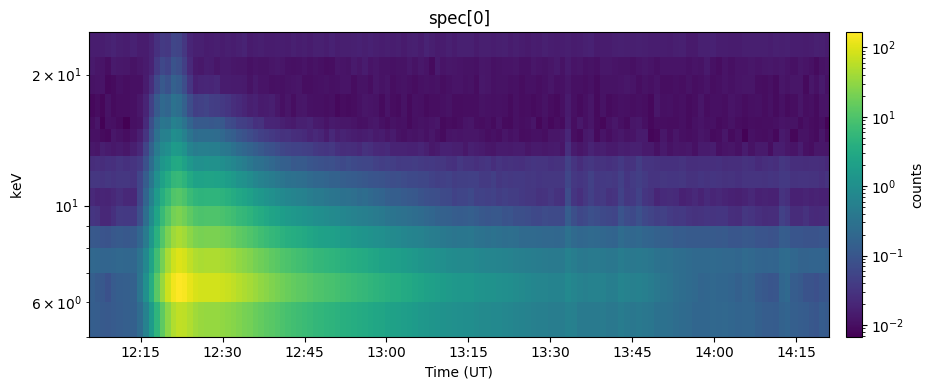

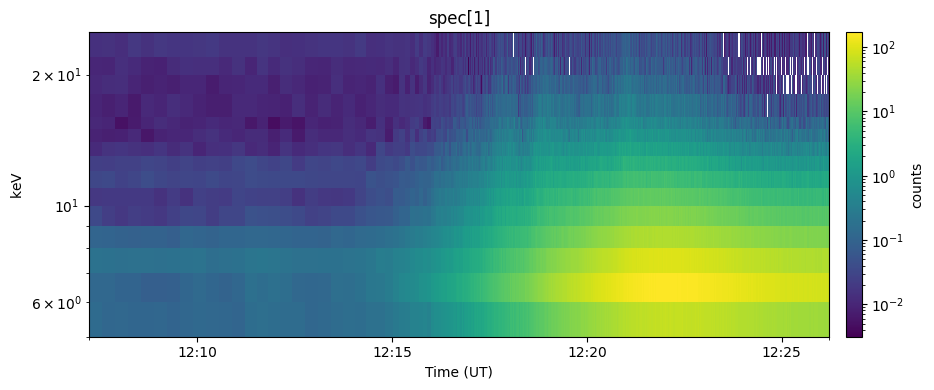

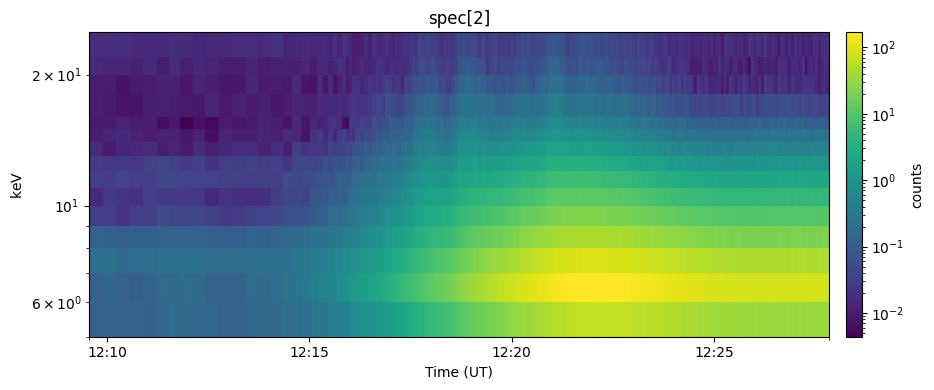

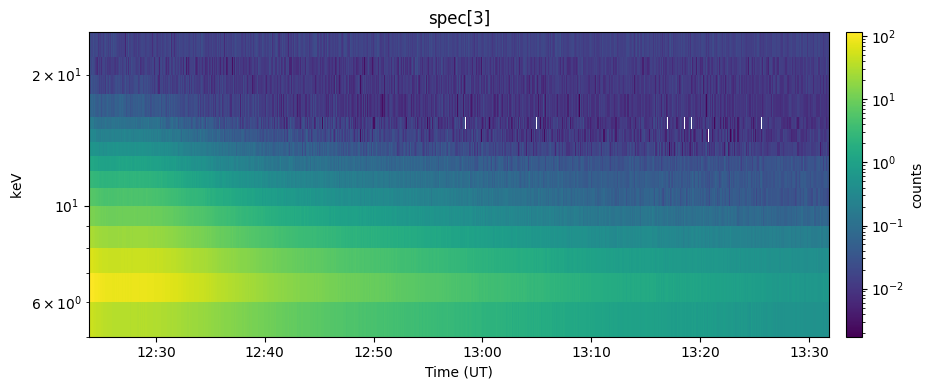

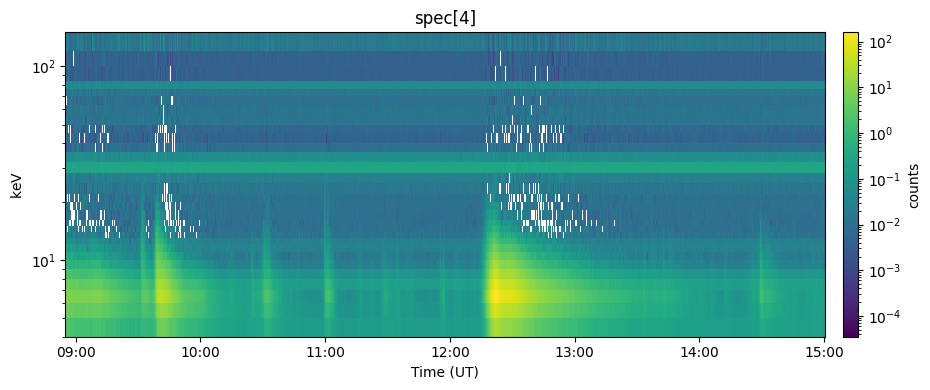

In [24]:
for i in range(len(dyspec)):
    fig, ax = plt.subplots(figsize=[10,4])
    dyspec[i].plot_spectrogram(axes=ax)
    
    # Find the last QuadMesh artist added (likely your spectrogram)
    im = [obj for obj in ax.get_children() if isinstance(obj, QuadMesh)][-1]
    cbar = fig.colorbar(im, ax=ax, pad=0.02)
    cbar.set_label(dyspec[i].meta['BUNIT'])
    
    ax.set_title(f'spec[{i}]')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_yscale('log')
    ax.set_xlabel('Time (UT)')
    # ax.set_xlim(left=low_times[0], right=low_times[-1])
    fig.tight_layout()
    plt.show()

In [106]:
spec = dyspec[-1]
# spec.energies

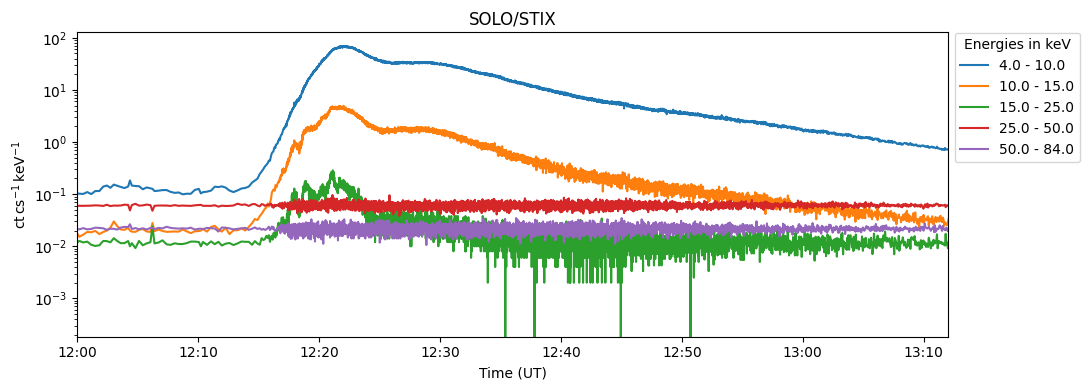

In [107]:
# Plot STIX sci-data
fig, ax = plt.subplots(figsize=[11,4])
spec.plot_timeseries(axes=ax, detector_indices=[[0,31]], pixel_indices=[[0,11]], energy_indices=[[1,6], [7,11], [12,16], [17,22], [23,27]])
ax.legend(bbox_to_anchor=(1, 0.55), title='Energies in keV')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Prevent x-tick label rotation
plt.setp(ax.get_xticklabels(), rotation=0)
# Center-align the labels
for label in ax.get_xticklabels():
    label.set_horizontalalignment('center')

# ax.set_xlim(left=spec.times[0].isot, right=spec.times[-1].isot)
ax.set_xlim(left=pd.Timestamp(start_time)-timedelta(minutes=21), right=end_time)
ax.set_xlabel('Time (UT)')
ax.set_title(spec.meta['TELESCOP'])
fig.tight_layout()
plt.show()

### Fix the scalling of the flux and time shifting

In [ ]:
mytuple = spec.get_data(detector_indices=[[0,31]], pixel_indices=[[0,11]], energy_indices=[[1,6], [7,11], [12,16], [17,22], [23,27]])

# Unpack the tuple
flux, _, times, _, energy_bins = mytuple

times_arr = times.datetime

energy_bands = []
for i, j in zip(energy_bins['e_low'], energy_bins['e_high']):
    low_energy  = i.value.astype('int')
    high_energy = j.value.astype('int')
    energy_bands.append(f'{low_energy}-{high_energy} keV')

# Squeeze and scale the flux array (shape: N_times, 5)
# flux_arr = (flux.squeeze() * 200).value  # convert to numpy array if it's still a Quantity
flux_arr = (flux.squeeze()).value

# Get datetime values for the index
times_arr = times.datetime

# Create the DataFrame
df = pd.DataFrame(flux_arr, columns=energy_bands, index=times_arr)

df.head()

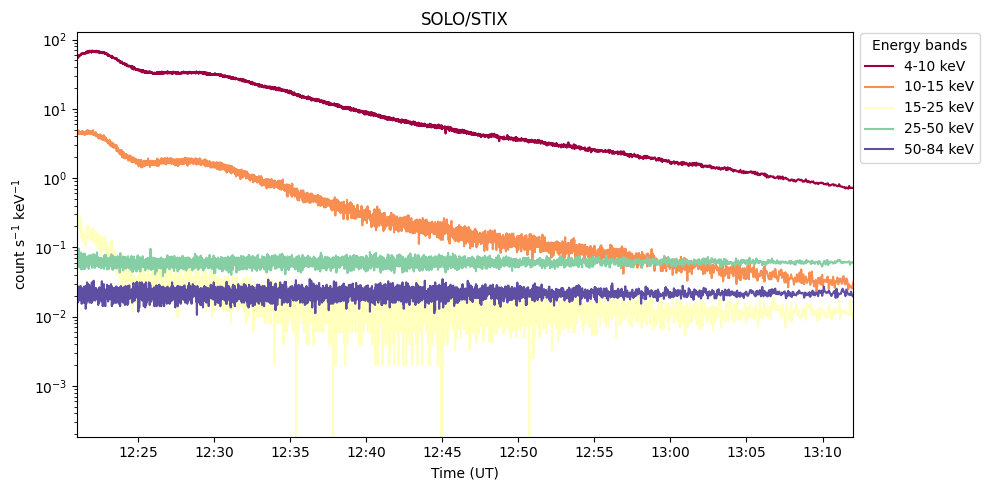

In [151]:
fig = plt.figure(figsize=[10,5])
ax  = fig.add_subplot(111)

cmap        = plt.cm.get_cmap('Spectral') # Spectral, Blues
num_lines   = len(df.columns)
colors_list = cmap(np.linspace(0, 1, num_lines))

for i, col in enumerate(df.columns):
    ax.plot(times_arr, df[col], color=colors_list[i], label=col)

ax.set_yscale('log')
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'count s$^{-1}$ keV$^{-1}$')
ax.set_title(spec.meta['TELESCOP'])
ax.legend(bbox_to_anchor=(1, 0.66), title='Energy bands')
ax.set_xlim(left=start_time, right=end_time)
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

In [152]:
# Convert DataFrame index to Time object
time_obj = Time(df.index.to_pydatetime())
time_shifted = time_obj + (spec.meta['EAR_TDEL'])*u.s
time_shifted = time_shifted.datetime

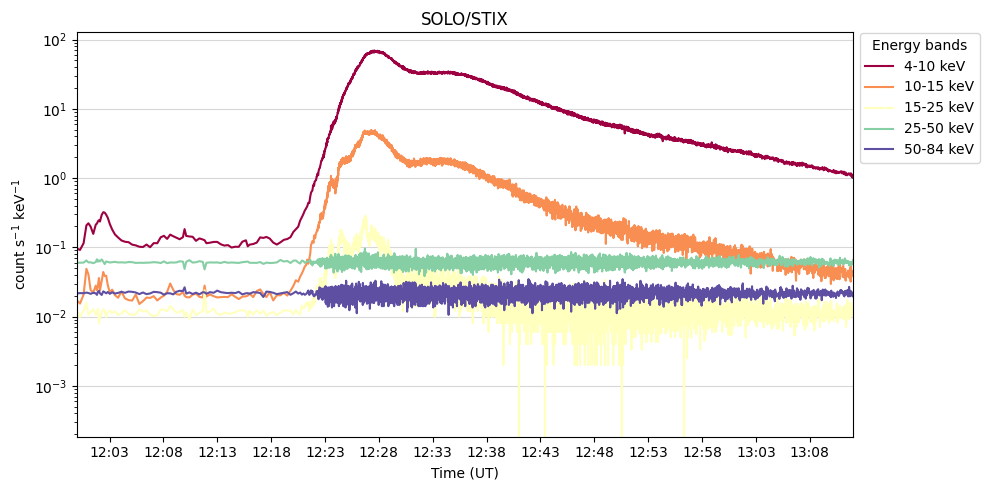

In [154]:
fig = plt.figure(figsize=[10,5])
ax  = fig.add_subplot(111)

cmap        = plt.cm.get_cmap('Spectral') # Spectral, gist_rainbow, nipy_spectral, gist_ncar, Blues
num_lines   = len(df.columns)
colors_list = cmap(np.linspace(0, 1, num_lines))

for i, col in enumerate(df.columns):
    ax.plot(time_shifted, df[col], color=colors_list[i], label=col)

ax.set_yscale('log')
ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'count s$^{-1}$ keV$^{-1}$')
ax.set_title(spec.meta['TELESCOP'])
ax.legend(bbox_to_anchor=(1, 0.66), title='Energy bands')
# ax.set_xlim(left=start_time, right=end_time)
ax.set_xlim(left=pd.Timestamp(start_time)-timedelta(minutes=21), right=end_time)
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.grid(axis='y', alpha=0.5)
fig.tight_layout()
plt.show()

In [3]:
import stixpy

stixpy.__version__

'0.1.1'

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

[]

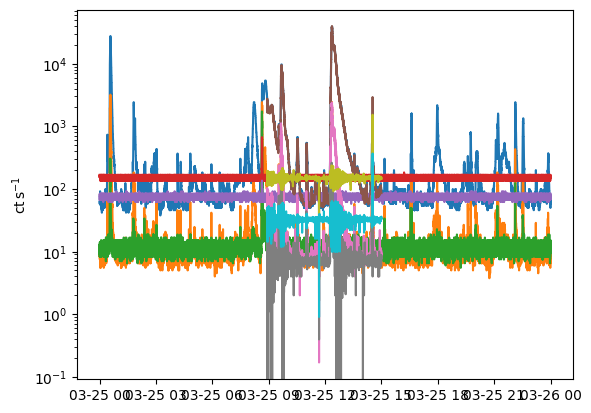

In [2]:
start_time = '2025-03-25 10:44:59.94'
end_time   = '2025-03-25 10:48:59.94'

sci_query = Fido.search(a.Time(start_time, end_time),
                        a.Instrument.stix, a.stix.DataType.sci)
sci_files = Fido.fetch(sci_query)
dyspec = Product(sci_files[0])

ql_lc_query = Fido.search(a.Time(start_time, end_time),
                          a.Instrument.stix, a.stix.DataProduct.ql_lightcurve)
ql_lc_files = Fido.fetch(ql_lc_query)
ql_lc = Product(ql_lc_files[0])

plt.plot(ql_lc.data['time'].datetime, ql_lc.data['counts']/ql_lc.data['timedel'].reshape(-1, 1).to('s'))
plt.plot(dyspec.times.datetime, np.array([dyspec.data['counts'][...,lo:hi].sum(axis=(1))/dyspec.duration.to('s') 
                                          for lo, hi in [[1,6], [7,11], [12,16], [17,22], [23,27]]]).T)
plt.semilogy()

In [5]:
np.diff(dyspec.times.datetime)[0].total_seconds()

0.6

In [2]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido
from stixpy.product import Product
from datetime import datetime
from sunpy.timeseries import TimeSeries
import pdb, pylab
import matplotlib.pyplot as plt
from matplotlib import dates
import astropy.units as u
import numpy as np
from astropy.io import fits

sci_query = Fido.search(a.Time('2025-03-25T12:00', '2025-03-25T13:10'),
                        a.Instrument.stix, a.stix.DataType.sci)

sci_files = Fido.fetch(sci_query)
files = fits.open(sci_files[0])
sci_lightcurves = TimeSeries(sci_files)

### let's do timedelay correction and convert to datetime objects
df = sci_lightcurves.to_dataframe()
crrct_times = sci_lightcurves.time+(files[0].header['EAR_TDEL'])*u.s
times = crrct_times.datetime

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20250325T115249-20250325T120019_V02_2503259709-49570.fits:   0%|          | 0.00/683…

NoMatchError: Input read by sunpy.io can not find a matching class for reading multiple HDUs

In [4]:
len(sci_files)

6

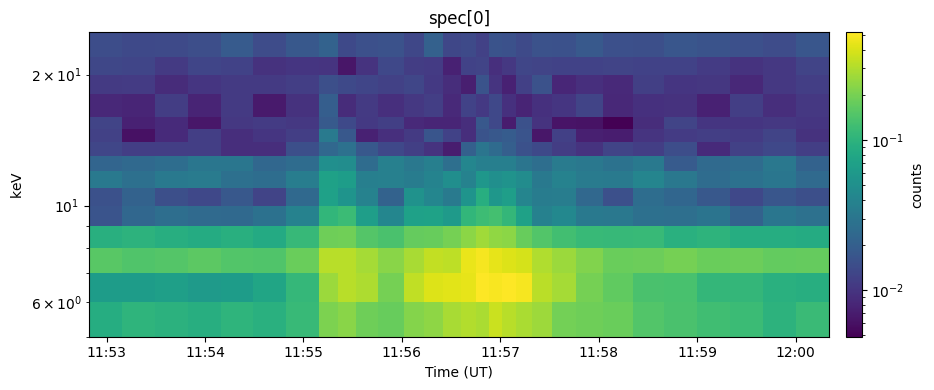

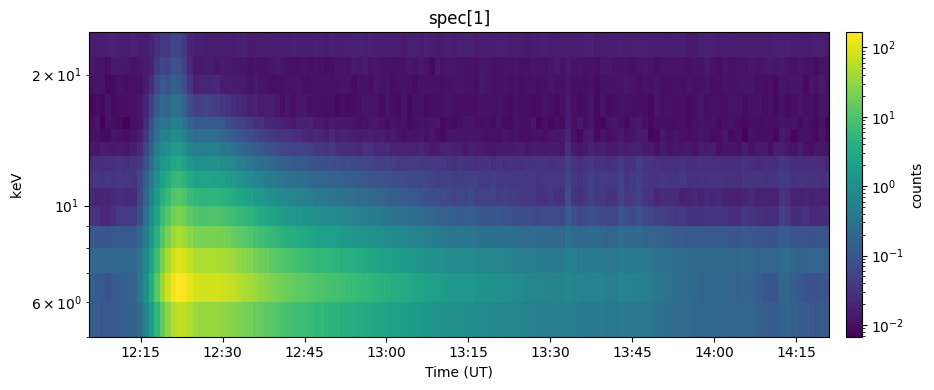

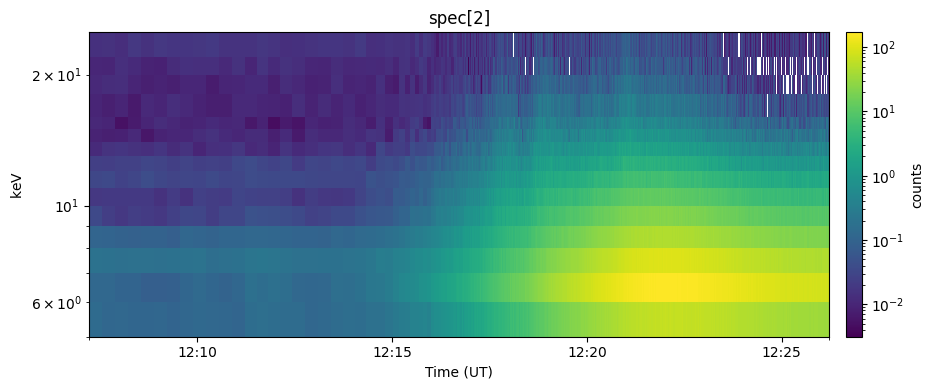

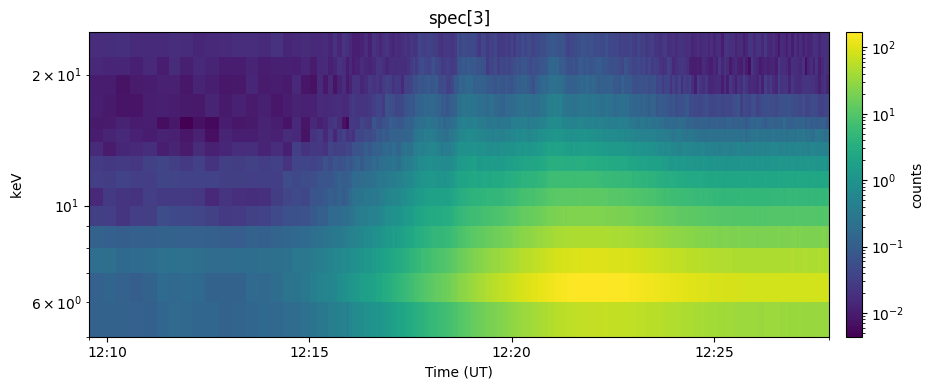

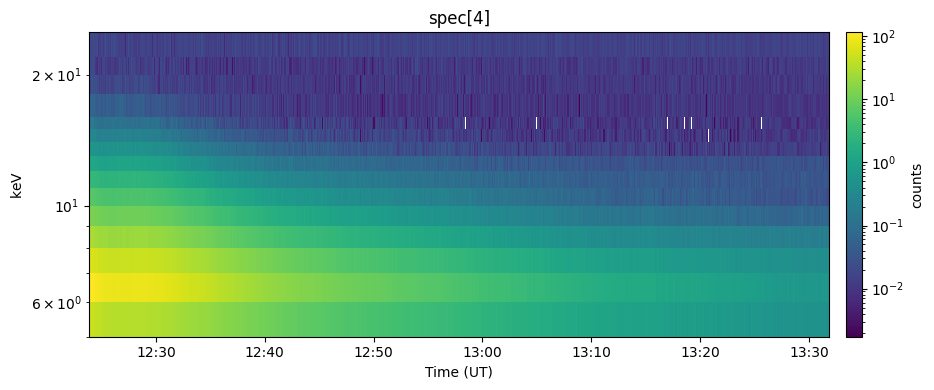

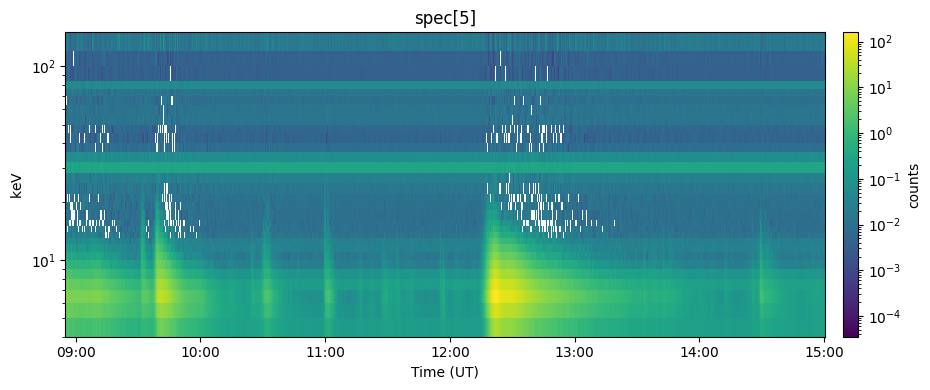

In [9]:
dyspec = Product(sci_files)

for i in range(len(dyspec)):
    fig, ax = plt.subplots(figsize=[10,4])
    dyspec[i].plot_spectrogram(axes=ax)
    
    # Find the last QuadMesh artist added (likely your spectrogram)
    im = [obj for obj in ax.get_children() if isinstance(obj, QuadMesh)][-1]
    cbar = fig.colorbar(im, ax=ax, pad=0.02)
    cbar.set_label(dyspec[i].meta['BUNIT'])
    
    ax.set_title(f'spec[{i}]')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_yscale('log')
    ax.set_xlabel('Time (UT)')
    # ax.set_xlim(left=low_times[0], right=low_times[-1])
    fig.tight_layout()
    plt.show()

In [22]:
dyspec[-1]

Spectrogram   <sunpy.time.timerange.TimeRange object at 0x73460f7916d0>
    Start: 2025-03-25 08:54:58
    End:   2025-03-25 15:00:15
    Center:2025-03-25 11:57:37
    Duration:0.25366782407407407 days or
           6.088027777777778 hours or
           365.28166666666664 minutes or
           21916.899999999998 seconds
    DetectorMasks
    [0]: [0,1,2,3,4,5,6,7,_,_,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0...9629]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]

    EnergyMasks
    [0]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

In [14]:
[x for x in dir(dyspec[-1]) if not x.startswith('_')]

['concatenate',
 'control',
 'count_type',
 'dE',
 'data',
 'detector_masks',
 'detectors',
 'durtaion',
 'energies',
 'energy_masks',
 'get_data',
 'idb_versions',
 'is_datasource_for',
 'level',
 'meta',
 'pixel_masks',
 'pixels',
 'plot_spectrogram',
 'plot_timeseries',
 'service_type',
 'servie_subtype',
 'ssid',
 'time_range',
 'times']